In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

**1. Load the export-1-.csv**

*The file contains separator ';' between the data; the columns 'calendar_date' and 'registration_date' have object data format*.

In [2]:
# Let's load the export-1-.csv file with the correct separator and data formats
df = pd.read_csv('export-1-.csv', sep=';', parse_dates=[1, 3])

In [3]:
df.head()

user calendar_date   market registration_date  \
0  ee4f7c89d7080868825d2ffdd0d2f6fd    2012-03-08  Tallinn        2010-12-14   
1  d189b0898ad5bcc567499d57b052490b    2012-03-07  Tallinn        2010-12-27   
2  f73f78d17d51f564e69627944806a141    2012-03-08  Tallinn        2011-10-14   
3  46749ed216109738ff5a2c826fe19699    2012-03-23  Tallinn        2011-12-04   
4  e8d9f288f8df372d0231c63f9488e50d    2012-01-19  Tallinn        2011-07-09   

      bet     win  session_duration_min  bonus  
0    8.50    8.71                  14.0  11.89  
1   79.25   86.90                  31.3   0.00  
2  208.33  213.57                  12.1   0.00  
3  225.13  242.84                   2.5   0.00  
4  417.35  390.40                  31.2  13.84

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26498 entries, 0 to 26497
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  26498 non-null  object        
 1   calendar_date         26498 non-null  datetime64[ns]
 2   market                26498 non-null  object        
 3   registration_date     26498 non-null  datetime64[ns]
 4   bet                   26498 non-null  float64       
 5   win                   26498 non-null  float64       
 6   session_duration_min  26498 non-null  float64       
 7   bonus                 26498 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 1.6+ MB


**2. Add an GGR column**

*GGR (gross gaming revenue) = Bet - Win, indicating net wins (positive value = profit for the operator, negative value = loss for the operator).*

In [6]:
df['ggr'] = round(df.bet - df.win, 2)

In [7]:
df.head()

user calendar_date   market registration_date  \
0  ee4f7c89d7080868825d2ffdd0d2f6fd    2012-03-08  Tallinn        2010-12-14   
1  d189b0898ad5bcc567499d57b052490b    2012-03-07  Tallinn        2010-12-27   
2  f73f78d17d51f564e69627944806a141    2012-03-08  Tallinn        2011-10-14   
3  46749ed216109738ff5a2c826fe19699    2012-03-23  Tallinn        2011-12-04   
4  e8d9f288f8df372d0231c63f9488e50d    2012-01-19  Tallinn        2011-07-09   

      bet     win  session_duration_min  bonus    ggr  
0    8.50    8.71                  14.0  11.89  -0.21  
1   79.25   86.90                  31.3   0.00  -7.65  
2  208.33  213.57                  12.1   0.00  -5.24  
3  225.13  242.84                   2.5   0.00 -17.71  
4  417.35  390.40                  31.2  13.84  26.95

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26498 entries, 0 to 26497
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  26498 non-null  object        
 1   calendar_date         26498 non-null  datetime64[ns]
 2   market                26498 non-null  object        
 3   registration_date     26498 non-null  datetime64[ns]
 4   bet                   26498 non-null  float64       
 5   win                   26498 non-null  float64       
 6   session_duration_min  26498 non-null  float64       
 7   bonus                 26498 non-null  float64       
 8   ggr                   26498 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(2)
memory usage: 1.8+ MB


**3. Add a margin column**

*Margin % (house edge) = GGR / Bet.*

In [9]:
df['margin'] = round(df['ggr'] / df['bet'], 2)

In [10]:
df.head()

user calendar_date   market registration_date  \
0  ee4f7c89d7080868825d2ffdd0d2f6fd    2012-03-08  Tallinn        2010-12-14   
1  d189b0898ad5bcc567499d57b052490b    2012-03-07  Tallinn        2010-12-27   
2  f73f78d17d51f564e69627944806a141    2012-03-08  Tallinn        2011-10-14   
3  46749ed216109738ff5a2c826fe19699    2012-03-23  Tallinn        2011-12-04   
4  e8d9f288f8df372d0231c63f9488e50d    2012-01-19  Tallinn        2011-07-09   

      bet     win  session_duration_min  bonus    ggr  margin  
0    8.50    8.71                  14.0  11.89  -0.21   -0.02  
1   79.25   86.90                  31.3   0.00  -7.65   -0.10  
2  208.33  213.57                  12.1   0.00  -5.24   -0.03  
3  225.13  242.84                   2.5   0.00 -17.71   -0.08  
4  417.35  390.40                  31.2  13.84  26.95    0.06

**4. Add a NGR column**

*Bonus – funds paid out to the user by the operator to reward or incentivize certain behaviors.*

*NGR = GGR – Bonus, gives us net profit.*

In [11]:
df['ngr'] = round(df['ggr'] - df['bonus'],2)

In [12]:
df.head()

user calendar_date   market registration_date  \
0  ee4f7c89d7080868825d2ffdd0d2f6fd    2012-03-08  Tallinn        2010-12-14   
1  d189b0898ad5bcc567499d57b052490b    2012-03-07  Tallinn        2010-12-27   
2  f73f78d17d51f564e69627944806a141    2012-03-08  Tallinn        2011-10-14   
3  46749ed216109738ff5a2c826fe19699    2012-03-23  Tallinn        2011-12-04   
4  e8d9f288f8df372d0231c63f9488e50d    2012-01-19  Tallinn        2011-07-09   

      bet     win  session_duration_min  bonus    ggr  margin    ngr  
0    8.50    8.71                  14.0  11.89  -0.21   -0.02 -12.10  
1   79.25   86.90                  31.3   0.00  -7.65   -0.10  -7.65  
2  208.33  213.57                  12.1   0.00  -5.24   -0.03  -5.24  
3  225.13  242.84                   2.5   0.00 -17.71   -0.08 -17.71  
4  417.35  390.40                  31.2  13.84  26.95    0.06  13.11

**5. Examine the data if there any missing values or outliers**

*Used 'all' parametr to check datetime type too*

* It can be seen that the data was collected over 3 months(the amount of unique calendar date is 90) - from 2012-01-01 to 2012-03-30

* the most amount of session (383) was on 2012-03-11

* the most amount of registrations (1052) was on 2012-01-01, it's also first day of collecting the data

* At the same time amount of unique users is 2860  

* First registration date is 2010-07-02, I can suggest that there's a user who showed his activity at least once during period under review and it can be analize: Was it their first activity after registration or not? How many times during the period? Is it loyal user who gives to bissunes a good profit?

* It can be seen that the minimum of session_duration_min is 0.00. As I don't have information what the zero session means, I decide to separate these data.

* It can be seen that 75% bonus values = 0.00, after some analisis it turned out that 87% bonus values = 0.00

In [13]:
df.describe(include='all')

C:\Users\79500\AppData\Local\Temp\ipykernel_10540\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\79500\AppData\Local\Temp\ipykernel_10540\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


user        calendar_date   market  \
count                              26498                26498    26498   
unique                              2860                   90        3   
top     747af6e9cf2908cc24e79ec7891068c7  2012-03-11 00:00:00  Tallinn   
freq                                  84                  383    19776   
first                                NaN  2012-01-01 00:00:00      NaN   
last                                 NaN  2012-03-30 00:00:00      NaN   
mean                                 NaN                  NaN      NaN   
std                                  NaN                  NaN      NaN   
min                                  NaN                  NaN      NaN   
25%                                  NaN                  NaN      NaN   
50%                                  NaN                  NaN      NaN   
75%                                  NaN                  NaN      NaN   
max                                  NaN                  NaN      NaN   

          registration_date           bet           win  session_duration_min  \
count                 26498  2.649800e+04  2.649800e+04          26498.000000   
unique                  598           NaN           NaN                   NaN   
top     2012-01-01 00:00:00           NaN           NaN                   NaN   
freq                   1052           NaN           NaN                   NaN   
first   2010-07-02 00:00:00           NaN           NaN                   NaN   
last    2012-03-25 00:00:00           NaN           NaN                   NaN   
mean                    NaN  2.459285e+04  2.401360e+04             29.693784   
std                     NaN  1.443699e+05  1.414599e+05             23.445582   
min                     NaN -1.142400e+02  1.000000e-02              0.000000   
25%                     NaN  5.444750e+01  1.000450e+02             11.200000   
50%                     NaN  1.804300e+02  2.146900e+02             24.700000   
75%                     NaN  3.664250e+02  3.945525e+02             42.500000   
max                     NaN  4.756484e+06  4.668582e+06            165.500000   

               bonus            ggr        margin            ngr  
count   26498.000000   26498.000000  26498.000000   26498.000000  
unique           NaN            NaN           NaN            NaN  
top              NaN            NaN           NaN            NaN  
freq             NaN            NaN           NaN            NaN  
first            NaN            NaN           NaN            NaN  
last             NaN            NaN           NaN            NaN  
mean      194.234528     579.251995     -3.751542     385.017467  
std      2300.825910   12358.947162    288.336009   12383.038323  
min         0.000000 -351227.130000 -16557.330000 -403386.930000  
25%         0.000000     -10.290000     -0.040000     -14.040000  
50%         0.000000       0.780000      0.020000       0.100000  
75%         0.000000      11.520000      0.060000       9.950000  
max     52159.800000  539598.570000  30055.000000  539598.570000

In [14]:
df['bonus'].quantile(0.87)

0.0

**6. Determine and separate the data with zero session duration and negative bet**

*It can be seen that despite zero session duration there aren't missing values in the other columns*

*But the bonus column has a lot of zero values too, I can suggest that the duration of session correlates with bonus, but as I noticed earlier 87% bonus values less or equel 0.00, so my suggestion isn't true*

*I noticed that there're about 934 rows with negative bet, let's separate them too*

In [15]:
df[df['bet'] <= 0.00]

user calendar_date market  \
36     15a9e2300a08b1c2d6a2540ffbb9230a    2012-03-19  Tartu   
118    1592e1f8883c3c3c7061bbbd78f2c626    2012-02-04  Narva   
145    49a8bb905c72b8aca1fe999fde2f58c6    2012-03-01  Tartu   
153    a6a846358ec3ae9d161db1463246f8fd    2012-01-31  Tartu   
167    1a9fade9a68e2e5d7e5aff4dc6e32179    2012-03-18  Tartu   
...                                 ...           ...    ...   
26357  30db723085dc54aa7fe7588145dfb91d    2012-03-19  Tartu   
26359  a50105ac0609a6f3025b2de6fdd65ee7    2012-03-10  Tartu   
26403  d83b0759853090daa5c0f25582f9b54c    2012-01-17  Tartu   
26424  f8c4e1a5b43889d9e5cf593992367ae2    2012-03-19  Narva   
26461  15a9e2300a08b1c2d6a2540ffbb9230a    2012-02-26  Tartu   

      registration_date     bet     win  session_duration_min  bonus     ggr  \
36           2011-02-28   -2.64  269.11                  56.4    0.0 -271.75   
118          2011-10-18   -0.98  721.11                  37.8    0.0 -722.09   
145          2010-10-17   -7.12   82.53                  44.0    0.0  -89.65   
153          2011-06-04   -6.96   52.22                  68.3    0.0  -59.18   
167          2010-11-14   -1.60  189.98                  36.3    0.0 -191.58   
...                 ...     ...     ...                   ...    ...     ...   
26357        2011-03-02   -2.16  114.94                   1.8    0.0 -117.10   
26359        2012-02-25   -0.50    7.86                  44.6    0.0   -8.36   
26403        2011-05-19   -4.98  134.12                  36.6    0.0 -139.10   
26424        2011-08-26 -114.24   73.36                  30.3    0.0 -187.60   
26461        2011-02-28   -1.65   45.57                  43.7    0.0  -47.22   

       margin     ngr  
36     102.94 -271.75  
118    736.83 -722.09  
145     12.59  -89.65  
153      8.50  -59.18  
167    119.74 -191.58  
...       ...     ...  
26357   54.21 -117.10  
26359   16.72   -8.36  
26403   27.93 -139.10  
26424    1.64 -187.60  
26461   28.62  -47.22  

[934 rows x 11 columns]

In [16]:
df[df['session_duration_min'] == 0.00]

user calendar_date   market  \
1652   f090b2e2fff2ca3d38dbb6c984beccbc    2012-02-26    Tartu   
2097   849d2e930729221722b7dc4107f8c0c5    2012-03-04  Tallinn   
2452   d2aa86b6698b693b90a09bce40bbaa85    2012-02-03    Narva   
3671   93ed9dac62f07b778d61edb30f1e5daa    2012-02-18  Tallinn   
4828   5ab6f4e63496d50877cf4ed822450100    2012-03-24  Tallinn   
5182   f68e13fc429c0409150682ed2a94cc56    2012-01-21  Tallinn   
5682   a678102e332c070a36831f0080e4300a    2012-03-24  Tallinn   
6567   ac78a23f6b1b9e7e272890eb1662521e    2012-02-09    Tartu   
9076   633b9d7fd1e1bd12334938a3cb5b4a3b    2012-02-23    Narva   
10795  66e0edc3e56f102c2d1f99eab0cb0703    2012-03-02  Tallinn   
11740  3bae331c7acac27c9bf0616e9ce707c1    2012-03-21  Tallinn   
12276  d1498c28b4696282533479ac95e7b0bb    2012-01-04  Tallinn   
12314  b9dc2c3040297f72520ccb3a15533eb1    2012-01-09  Tallinn   
12499  04cc5e2ffea044945cf54fae5f7050b3    2012-03-21  Tallinn   
13712  6005e0d8a355dfecf50f407028b6f0c0    2012-02-26    Narva   
14052  7228b4fedf1a12b41f8a7a5d9604d7d4    2012-01-22  Tallinn   
14273  2e5723fde3363097a439bd96462f31cd    2012-02-07  Tallinn   
14333  810811ed6ae6f20d7c3a158a1699183f    2012-03-10  Tallinn   
14574  c842b2ead3964cdd2a9fd0d8223fb63e    2012-03-21  Tallinn   
14657  4eaed8db9fbaba92f325fb7ec0aac3d4    2012-01-01    Narva   
14834  7aa159e74b0ba3afc19b4880965ed194    2012-03-20    Narva   
14905  524764a7e8b47e229517e5977f37d5d1    2012-01-14  Tallinn   
15044  c8b2a5ce7396f8d004c7da691c1d3e69    2012-03-13  Tallinn   
16372  46749ed216109738ff5a2c826fe19699    2012-03-26  Tallinn   
16937  b9dc2c3040297f72520ccb3a15533eb1    2012-01-05  Tallinn   
18063  148a126a9fb8e7b3a3c941e2da4b0671    2012-02-04  Tallinn   
18153  6579bb4cea7dfcc3aa460ed5e94e6f18    2012-03-18    Narva   
19268  ce0dc07c88d4c929770cc1448c21ea37    2012-03-02  Tallinn   
22452  e6e5dcbfd1ba1cd1b4cc759d01d57945    2012-01-12  Tallinn   
25584  50f55baca8acd38a2548089ba2297b6d    2012-03-17  Tallinn   
26138  ea4cbcb993f5e3ff6ecdd3fa72ab5834    2012-02-29    Narva   
26412  d27d55986f6d0e7011b25662d16e2aea    2012-02-09  Tallinn   

      registration_date        bet        win  session_duration_min  bonus  \
1652         2011-02-28     382.95     378.47                   0.0   0.00   
2097         2011-12-23     136.76     143.84                   0.0   9.84   
2452         2010-07-31     998.56     959.37                   0.0   0.00   
3671         2011-09-19   66277.30   60053.15                   0.0   0.00   
4828         2011-11-19   17531.36   17102.28                   0.0   0.00   
5182         2011-03-13     322.36     353.52                   0.0   0.00   
5682         2010-12-20     287.07     288.77                   0.0   0.00   
6567         2011-08-26       5.32       5.33                   0.0   0.00   
9076         2010-08-16       6.43     655.50                   0.0   0.00   
10795        2010-10-05     369.64     397.00                   0.0   0.00   
11740        2010-11-01     135.64     123.87                   0.0   0.00   
12276        2011-09-05      25.00      21.41                   0.0   7.89   
12314        2011-09-02      22.45      20.57                   0.0   0.00   
12499        2011-06-04     414.46     402.70                   0.0   0.00   
13712        2011-08-29      45.13     302.03                   0.0   0.00   
14052        2011-07-31     406.99     422.25                   0.0   0.00   
14273        2010-11-04     922.66     879.60                   0.0   0.00   
14333        2010-11-18     203.70     204.45                   0.0   0.00   
14574        2011-02-15     219.79     215.59                   0.0   0.00   
14657        2011-12-30       9.80    1174.80                   0.0   0.00   
14834        2011-07-27      44.48     131.07                   0.0   0.00   
14905        2011-04-01     232.61     234.26                   0.0   0.00   
15044        2010-12-30    1180.06    1285.70                 

In [17]:
df_copy = df.loc[(df['session_duration_min'] != 0.00) & (df['bet'] > 0.00)]

In [18]:
df_copy[df_copy['bet'] < 0]

Empty DataFrame
Columns: [user, calendar_date, market, registration_date, bet, win, session_duration_min, bonus, ggr, margin, ngr]
Index: []

In [19]:
df.describe()

bet           win  session_duration_min         bonus  \
count  2.649800e+04  2.649800e+04          26498.000000  26498.000000   
mean   2.459285e+04  2.401360e+04             29.693784    194.234528   
std    1.443699e+05  1.414599e+05             23.445582   2300.825910   
min   -1.142400e+02  1.000000e-02              0.000000      0.000000   
25%    5.444750e+01  1.000450e+02             11.200000      0.000000   
50%    1.804300e+02  2.146900e+02             24.700000      0.000000   
75%    3.664250e+02  3.945525e+02             42.500000      0.000000   
max    4.756484e+06  4.668582e+06            165.500000  52159.800000   

                 ggr        margin            ngr  
count   26498.000000  26498.000000   26498.000000  
mean      579.251995     -3.751542     385.017467  
std     12358.947162    288.336009   12383.038323  
min   -351227.130000 -16557.330000 -403386.930000  
25%       -10.290000     -0.040000     -14.040000  
50%         0.780000      0.020000       0.100000  
75%        11.520000      0.060000       9.950000  
max    539598.570000  30055.000000  539598.570000

In [20]:
df_copy.describe()

bet           win  session_duration_min         bonus  \
count  2.553200e+04  2.553200e+04          25532.000000  25532.000000   
mean   2.551460e+04  2.490403e+04             29.712960    201.581781   
std    1.469932e+05  1.440324e+05             23.438211   2343.633315   
min    1.000000e-02  1.000000e-02              0.100000      0.000000   
25%    6.661750e+01  1.004675e+02             11.200000      0.000000   
50%    1.907000e+02  2.158150e+02             24.700000      0.000000   
75%    3.753000e+02  3.967325e+02             42.500000      0.000000   
max    4.756484e+06  4.668582e+06            165.500000  52159.800000   

                 ggr        margin            ngr  
count   25532.000000  25532.000000   25532.000000  
mean      610.564102    -11.261976     408.982321  
std     12589.330230    180.538027   12614.317001  
min   -351227.130000 -16557.330000 -403386.930000  
25%        -7.692500     -0.040000     -10.982500  
50%         1.180000      0.010000       0.390000  
75%        12.080000      0.060000      10.582500  
max    539598.570000      0.990000  539598.570000

**7. New users for every months**

*New users represent players who have recently registered*

In [21]:
registered_january = df_copy[(df_copy['registration_date'] >= '2012-01-01') & (df_copy['registration_date'] <= '2012-01-31')]
registered_january_cnt = registered_january.groupby(['market', 'registration_date'])['user'].nunique().reset_index()

In [22]:
registered_january_cnt.groupby(['market'])['user'].sum()

market
Narva       17
Tallinn    128
Tartu       18
Name: user, dtype: int64

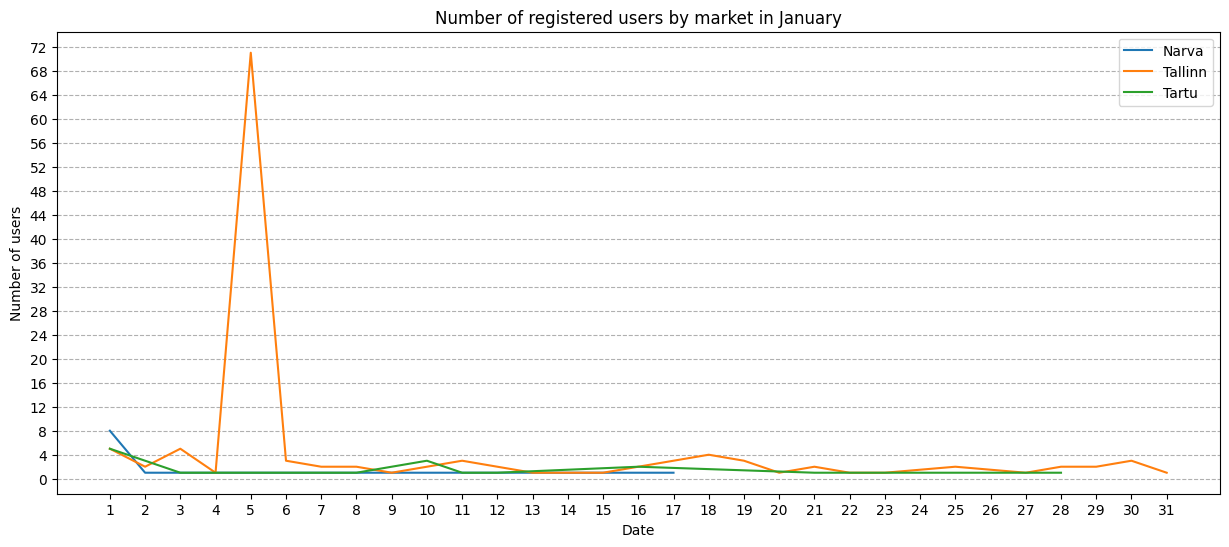

In [23]:
plt.figure(figsize=(15, 6))

# For each market, draw a line on the plot
for market in registered_january_cnt['market'].unique():
    market_data = registered_january_cnt[registered_january_cnt['market'] == market]
    plt.plot(market_data['registration_date'].dt.day, market_data['user'], label=market)

plt.xlabel('Date')
plt.ylabel('Number of users')
plt.legend()
plt.xticks(ticks=range(1, 32))
plt.yticks(ticks=range(0, 73, 4))
plt.grid(axis='y', linestyle='--')

plt.title('Number of registered users by market in January')

plt.show()

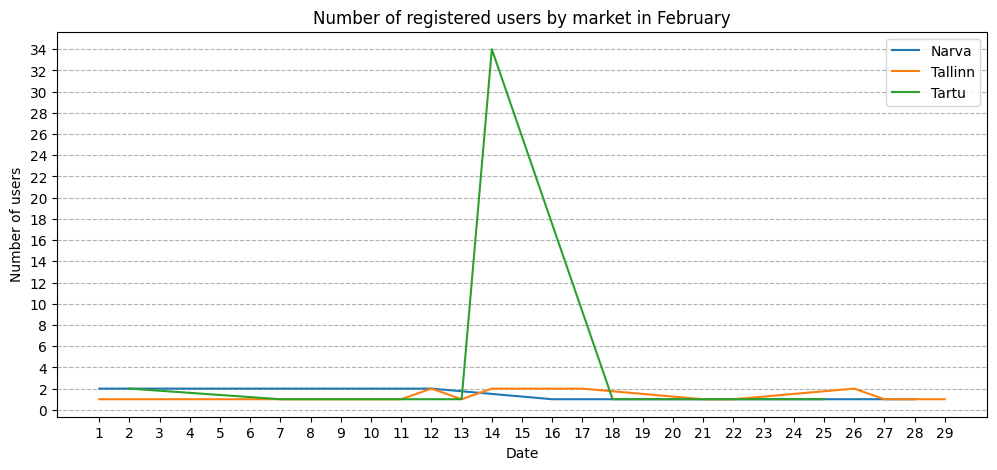

In [24]:
registered_february = df_copy[(df_copy['registration_date'] >= '2012-02-01') & (df_copy['registration_date'] <= '2012-02-29')]
registered_february_cnt = registered_february.groupby(['market', 'registration_date'])['user'].nunique().reset_index()

plt.figure(figsize=(12, 5))

# For each market, draw a line on the plot
for market in registered_february_cnt['market'].unique():
    market_data = registered_february_cnt[registered_february_cnt['market'] == market]
    plt.plot(market_data['registration_date'].dt.day, market_data['user'], label=market)

plt.xlabel('Date')
plt.ylabel('Number of users')
plt.legend()
plt.xticks(ticks=range(1, 30))
plt.yticks(ticks=range(0, 35, 2))
plt.grid(axis='y', linestyle='--')

plt.title('Number of registered users by market in February')

plt.show()

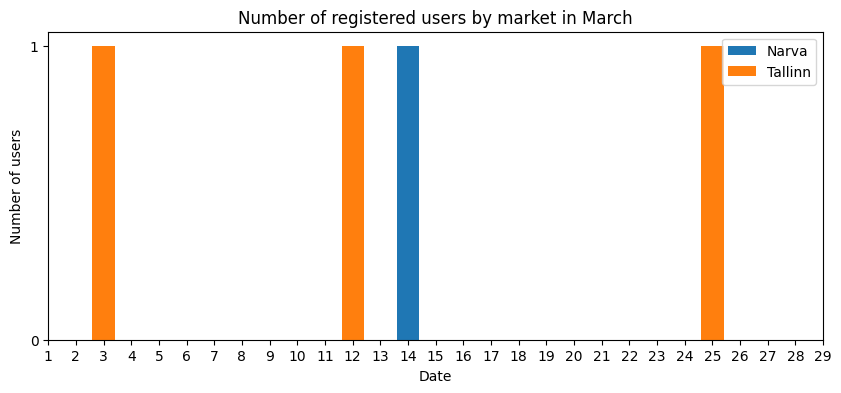

In [25]:
registered_march = df_copy[(df_copy['registration_date'] >= '2012-03-01') & (df_copy['registration_date'] <= '2012-03-31')]
registered_march_cnt = registered_march.groupby(['market', 'registration_date'])['user'].nunique().reset_index()

plt.figure(figsize=(10, 4))

# For each market, draw a line on the plot
for market in registered_march_cnt['market'].unique():
    market_data = registered_march_cnt[registered_march_cnt['market'] == market]
    plt.bar(market_data['registration_date'].dt.day, market_data['user'], label=market)

plt.xlabel('Date')
plt.ylabel('Number of users')
plt.legend()
plt.xticks(ticks=range(1, 30))
plt.yticks(ticks=range(0, 2))

plt.title('Number of registered users by market in March')

plt.show()

**8. Count MAU for every month**

*Let's identify Monthly Active Users as unique users who have made one bet per month*

*Let's count MAU for each market*

In [26]:
# Add a month column
df_copy['month'] = df_copy.loc[:, 'calendar_date'].dt.month

C:\Users\79500\AppData\Local\Temp\ipykernel_10540\2475238901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['month'] = df_copy.loc[:, 'calendar_date'].dt.month


In [27]:
# Group the data by month and city, determine the number of unique users
mau_per_month = df_copy.groupby(['month', 'market'])['user'].nunique()
mau_per_month.unstack()

market  Narva  Tallinn  Tartu
month                        
1         113     1263    220
2         116     1528    269
3         150     1684    285

In [28]:
ngr_per_month = df_copy.groupby(['month', 'market'])['ngr'].sum().unstack()

In [29]:
ngr_per_month

market       Narva     Tallinn       Tartu
month                                     
1       2737521.81  1345386.92 -2408528.08
2       1478580.94   884120.97   152415.08
3       2215215.13   518091.71  3519332.15

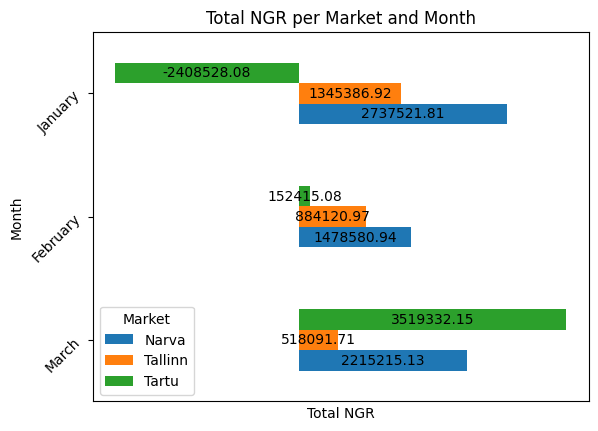

In [30]:
ngr_per_month = ngr_per_month[::-1]
ax = ngr_per_month.plot(kind='barh')

plt.ylabel('Month')
plt.xlabel('Total NGR')
plt.title('Total NGR per Market and Month')
plt.xticks([])  # Remove labels from x-axis
month_names = {1: 'January', 2: 'February', 3: 'March'} 
plt.yticks(ticks=range(len(ngr_per_month.index)), labels=[month_names[int(i)] for i in ngr_per_month.index]) 
plt.yticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='center')

plt.legend(title='Market')

plt.show()

In [31]:
# Add up the number of unique users for all cities in each month
mau_total = mau_per_month.groupby(level=0).sum()
mau_total

month
1    1596
2    1913
3    2119
Name: user, dtype: int64

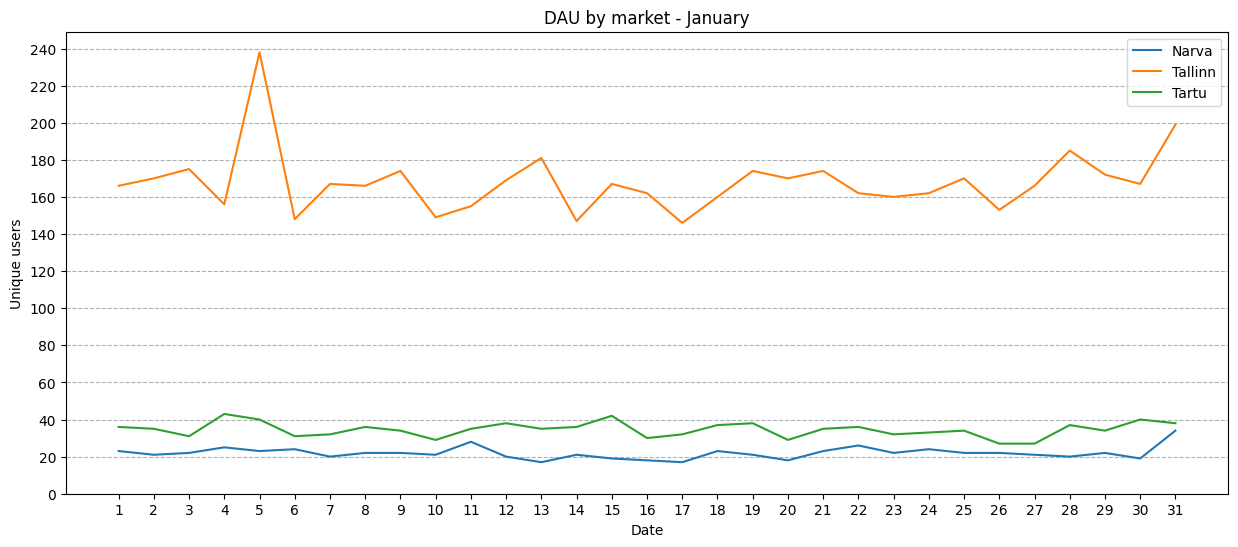

In [32]:
# Group data by month, calendar_date and market, determine the number of unique users
mau_per_day = df_copy.groupby(['month', 'calendar_date', 'market'])['user'].nunique().reset_index()

# Data only for January
first_month_data = mau_per_day[mau_per_day['month'] == 1]

# Iterates over the unique values of cities. The key represents a unique city and the value is a DataFrame with data for that city for the month.
city_data1 = {}
for city in first_month_data['market'].unique():
    city_data1[city] = first_month_data[first_month_data['market'] == city]
    
fig, ax = plt.subplots(figsize=(15, 6))

# For each market, draw a line on the plot
for market, data in city_data1.items():
    ax.plot(data['calendar_date'].dt.day, data['user'], label=market)

ax.set_xlabel('Date')
ax.set_ylabel('Unique users')
ax.legend()
plt.xticks(ticks=range(1, 32))
plt.yticks(ticks=range(0, 251, 20))
plt.grid(axis='y', linestyle='--')

plt.title('DAU by market - January')

plt.show()

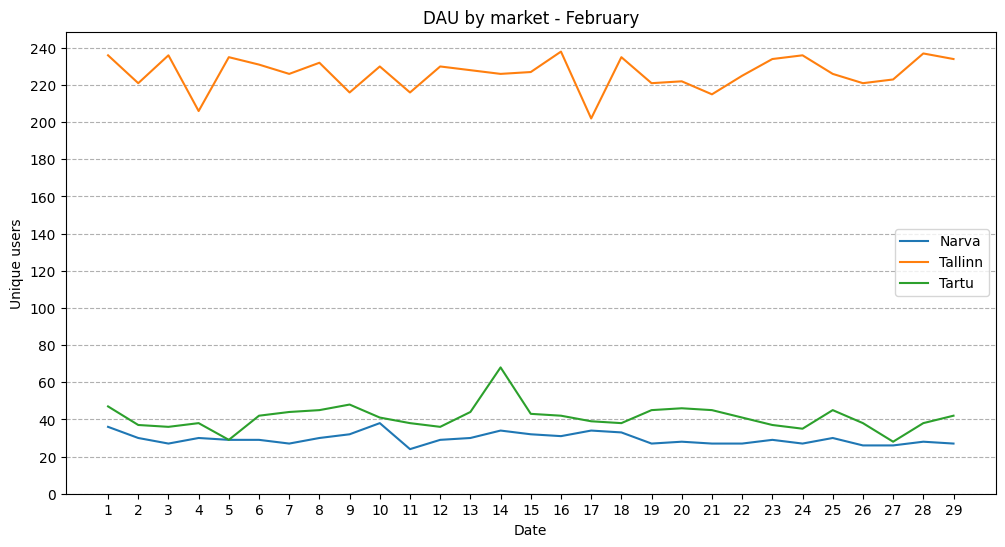

In [33]:
second_month_data = mau_per_day[mau_per_day['month'] == 2]

# Iterates over the unique values of cities. The key represents a unique city and the value is a DataFrame with data for that city for the month.
city_data2 = {}
for city in second_month_data['market'].unique():
    city_data2[city] = second_month_data[second_month_data['market'] == city]
    
fig, ax = plt.subplots(figsize=(12, 6))

# For each market, draw a line on the plot
for market, data in city_data2.items():
    ax.plot(data['calendar_date'].dt.day, data['user'], label=market)

ax.set_xlabel('Date')
ax.set_ylabel('Unique users')
ax.legend()
plt.xticks(ticks=range(1, 30))
plt.yticks(ticks=range(0, 251, 20))
plt.grid(axis='y', linestyle='--')

plt.title('DAU by market - February')

plt.show()

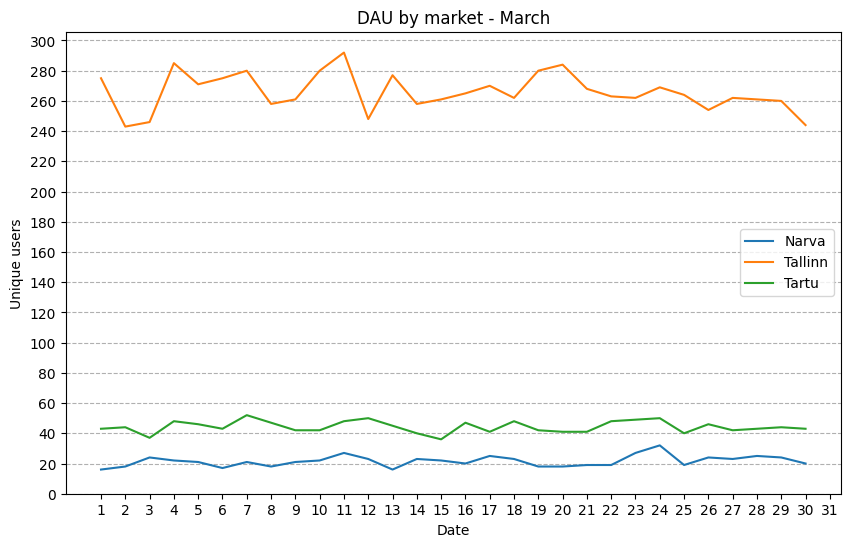

In [34]:
third_month_data = mau_per_day[mau_per_day['month'] == 3]

# Iterates over the unique values of cities. The key represents a unique city and the value is a DataFrame with data for that city for the month.
city_data3 = {}
for city in third_month_data['market'].unique():
    city_data3[city] = third_month_data[third_month_data['market'] == city]

fig, ax = plt.subplots(figsize=(10, 6))

# For each market, draw a line on the plot
for market, data in city_data3.items():
    ax.plot(data['calendar_date'].dt.day, data['user'], label=market)

ax.set_xlabel('Date')
ax.set_ylabel('Unique users')
ax.legend()
plt.xticks(ticks=range(1, 32))
plt.yticks(ticks=range(0, 301, 20))
plt.grid(axis='y', linestyle='--')

plt.title('DAU by market - March')

plt.show()

**9. Influence of the session_duration_min variable on the GGR(gross gaming revenue) variable.**

In [35]:
df_cor = df_copy.corr(numeric_only=True)

In [36]:
df_cor

bet       win  session_duration_min     bonus  \
bet                   1.000000  0.996464             -0.018212  0.350125   
win                   0.996464  1.000000             -0.017933  0.350120   
session_duration_min -0.018212 -0.017933              1.000000  0.004646   
bonus                 0.350125  0.350120              0.004646  1.000000   
ggr                   0.275641  0.193901             -0.007471  0.082408   
margin                0.010851  0.010616              0.001660  0.005381   
ngr                   0.210045  0.128468             -0.008319 -0.103547   
month                -0.031827 -0.033383             -0.004676 -0.014180   

                           ggr    margin       ngr     month  
bet                   0.275641  0.010851  0.210045 -0.031827  
win                   0.193901  0.010616  0.128468 -0.033383  
session_duration_min -0.007471  0.001660 -0.008319 -0.004676  
bonus                 0.082408  0.005381 -0.103547 -0.014180  
ggr                   1.000000  0.005246  0.982708  0.010319  
margin                0.005246  1.000000  0.004236  0.006289  
ngr                   0.982708  0.004236  1.000000  0.012933  
month                 0.010319  0.006289  0.012933  1.000000

In [37]:
mask = np.triu(df_cor).round(3)

In [38]:
mask

array([[ 1.   ,  0.996, -0.018,  0.35 ,  0.276,  0.011,  0.21 , -0.032],
       [ 0.   ,  1.   , -0.018,  0.35 ,  0.194,  0.011,  0.128, -0.033],
       [ 0.   ,  0.   ,  1.   ,  0.005, -0.007,  0.002, -0.008, -0.005],
       [ 0.   ,  0.   ,  0.   ,  1.   ,  0.082,  0.005, -0.104, -0.014],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.005,  0.983,  0.01 ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.004,  0.006],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.013],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ]])

<Axes: >

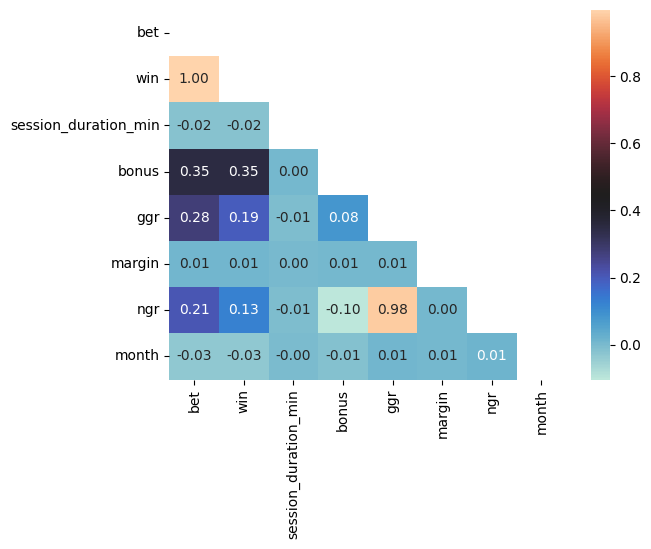

In [39]:
sns.heatmap(df_cor, annot=True, fmt='.2f', cmap='icefire', mask=mask)

<Axes: xlabel='session_duration_min', ylabel='ggr'>

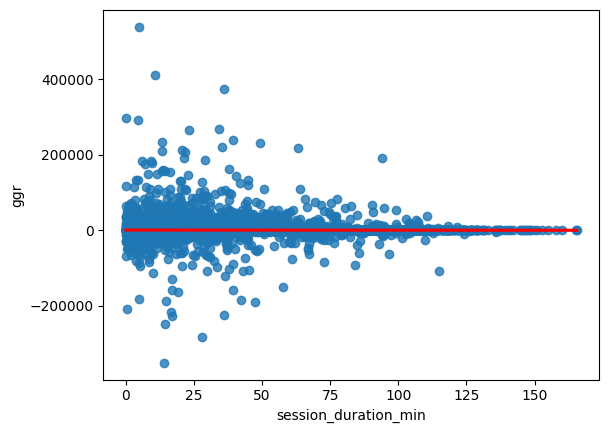

In [40]:
sns.regplot(data=df_copy, x='session_duration_min', y='ggr', line_kws={'color': 'red'}, ci=95)

In [41]:
df_copy.bet.sum() / df_copy.win.sum()

1.0245166759886055

**10. Influence of the bonus variable on the session_duration_min variable**

<Axes: xlabel='bonus', ylabel='session_duration_min'>

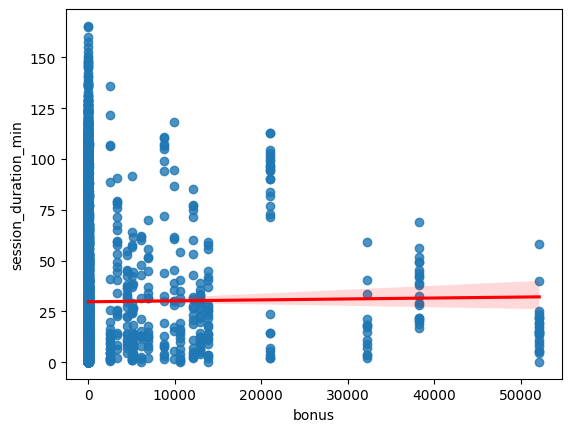

In [42]:
sns.regplot(data=df_copy, x='bonus', y='session_duration_min', line_kws={'color': 'red'}, ci=95)

**11. Influence of the bonus variable on the ngr**

In [43]:
unique_users_without_bonus = df[df['bonus'] == 0.00]['user'].unique()

ngr_without_bonus = []

# Go through each unique user without bonuses
for user in unique_users_without_bonus:
    ngr_for_user = df_copy[df_copy['user'] == user]['ngr'].values
    ngr_without_bonus.extend(ngr_for_user)

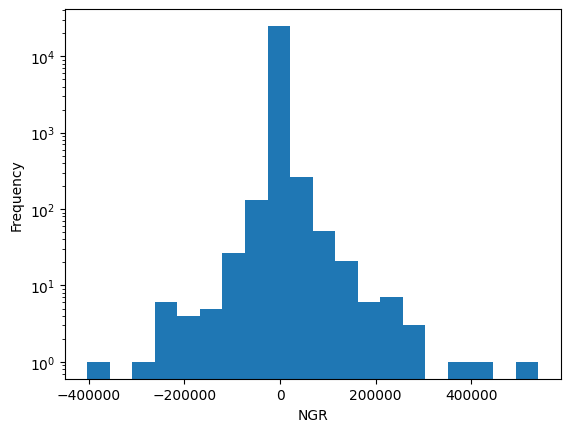

In [44]:
plt.hist(ngr_without_bonus, bins=20, log=True)
plt.xlabel('NGR')  
plt.ylabel('Frequency');

In [45]:
unique_users_with_bonus = df[df['bonus'] != 0.00]['user'].unique()

ngr_with_bonus = []

# Go through each unique user with bonuses
for user in unique_users_with_bonus:
    ngr_for_user = df_copy[df_copy['user'] == user]['ngr'].values
    ngr_with_bonus.extend(ngr_for_user)

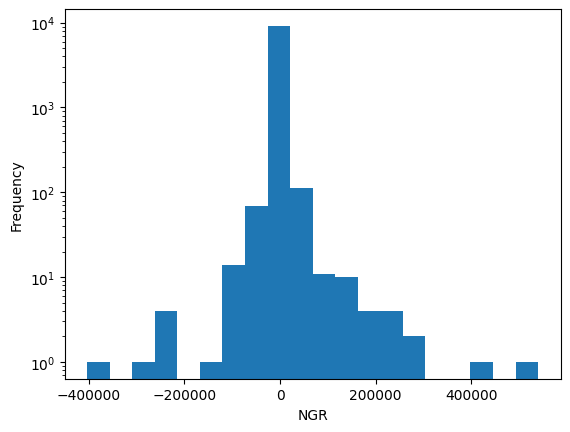

In [46]:
plt.hist(ngr_with_bonus, bins=20, log=True)
plt.xlabel('NGR')  
plt.ylabel('Frequency');

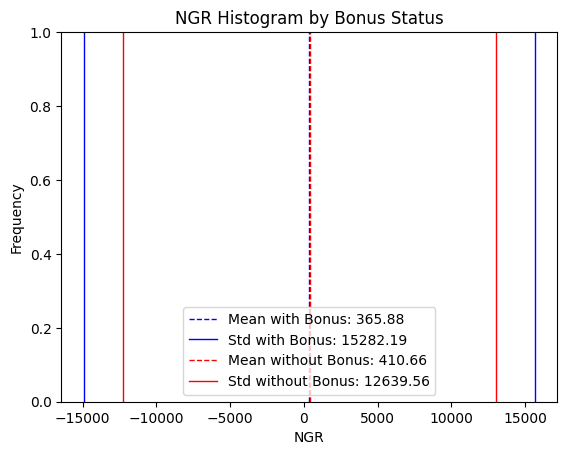

In [47]:
# Calculate the mean and standard deviation for a group with a paid bonus
mean_with_bonus = np.mean(ngr_with_bonus)
std_with_bonus = np.std(ngr_with_bonus)

# Calculate the mean and standard deviation for a group without paying a bonus
mean_without_bonus = np.mean(ngr_without_bonus)
std_without_bonus = np.std(ngr_without_bonus)

# Display the average and standard deviation on the graph for the group with the bonus paid
plt.axvline(mean_with_bonus, color='b', linestyle='--', linewidth=1, label=f'Mean with Bonus: {mean_with_bonus:.2f}')
plt.axvline(mean_with_bonus + std_with_bonus, color='b', linestyle='-', linewidth=1, label=f'Std with Bonus: {std_with_bonus:.2f}')
plt.axvline(mean_with_bonus - std_with_bonus, color='b', linestyle='-', linewidth=1)

# Display the average and standard deviation on the graph for a group without bonus payment
plt.axvline(mean_without_bonus, color='r', linestyle='--', linewidth=1, label=f'Mean without Bonus: {mean_without_bonus:.2f}')
plt.axvline(mean_without_bonus + std_without_bonus, color='r', linestyle='-', linewidth=1, label=f'Std without Bonus: {std_without_bonus:.2f}')
plt.axvline(mean_without_bonus - std_without_bonus, color='r', linestyle='-', linewidth=1)

plt.legend()

plt.xlabel('NGR')
plt.ylabel('Frequency')
plt.title('NGR Histogram by Bonus Status')

plt.show()

**12. NGR is trending upward**

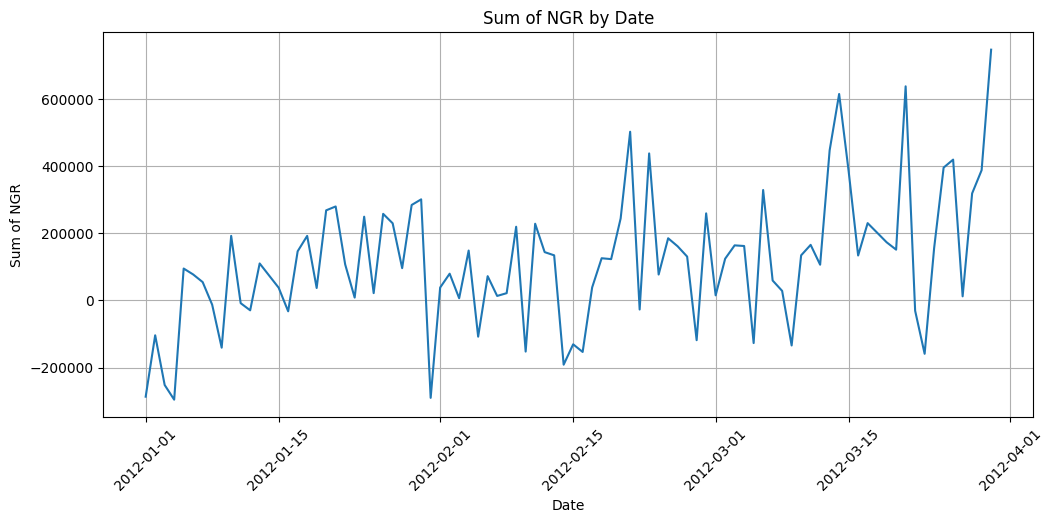

In [48]:
daily_ngr = df_copy.groupby('calendar_date')['ngr'].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_ngr.index, daily_ngr.values)

plt.xlabel('Date')
plt.ylabel('Sum of NGR')
plt.title('Sum of NGR by Date')

plt.xticks(rotation=45)
plt.grid()

plt.show()

### Distribution of different values

In [49]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [50]:
df_copy.head()

user calendar_date   market registration_date  \
0  ee4f7c89d7080868825d2ffdd0d2f6fd    2012-03-08  Tallinn        2010-12-14   
1  d189b0898ad5bcc567499d57b052490b    2012-03-07  Tallinn        2010-12-27   
2  f73f78d17d51f564e69627944806a141    2012-03-08  Tallinn        2011-10-14   
3  46749ed216109738ff5a2c826fe19699    2012-03-23  Tallinn        2011-12-04   
4  e8d9f288f8df372d0231c63f9488e50d    2012-01-19  Tallinn        2011-07-09   

      bet     win  session_duration_min  bonus    ggr  margin    ngr  month  
0    8.50    8.71                  14.0  11.89  -0.21   -0.02 -12.10      3  
1   79.25   86.90                  31.3   0.00  -7.65   -0.10  -7.65      3  
2  208.33  213.57                  12.1   0.00  -5.24   -0.03  -5.24      3  
3  225.13  242.84                   2.5   0.00 -17.71   -0.08 -17.71      3  
4  417.35  390.40                  31.2  13.84  26.95    0.06  13.11      1

Text(0.5, 1.0, 'Bet distribution with zero bonus')

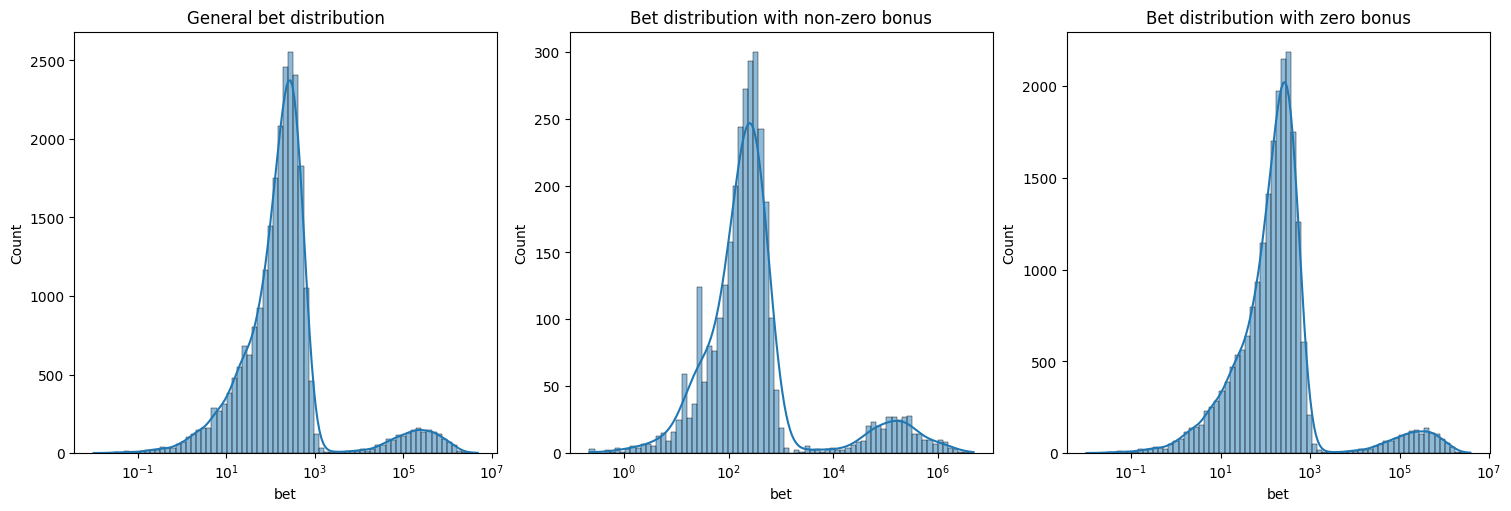

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

sns.histplot(df_copy.bet, bins=75, log_scale=True, kde=True, ax=ax1)
ax1.set_title('General bet distribution')
sns.histplot(df_copy[df_copy.bonus > 0].bet, bins=75, log_scale=True, kde=True, ax=ax2)
ax2.set_title('Bet distribution with non-zero bonus')
sns.histplot(df_copy[df_copy.bonus == 0].bet, bins=75, log_scale=True, kde=True, ax=ax3)
ax3.set_title('Bet distribution with zero bonus')

Text(0.5, 1.0, 'Session duration with zero bonus')

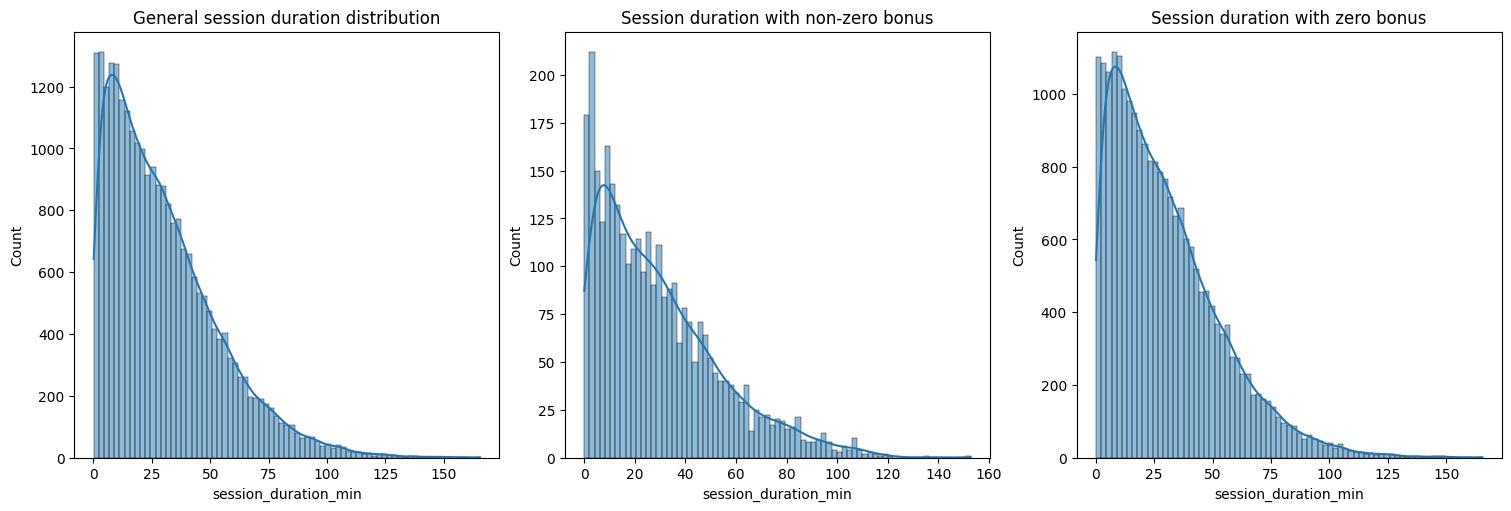

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

sns.histplot(df_copy.session_duration_min, bins=75, kde=True, ax=ax1)
ax1.set_title('General session duration distribution')
sns.histplot(df_copy[df_copy.bonus > 0].session_duration_min, bins=75, kde=True, ax=ax2)
ax2.set_title('Session duration with non-zero bonus')
sns.histplot(df_copy[df_copy.bonus == 0].session_duration_min, bins=75, kde=True, ax=ax3)
ax3.set_title('Session duration with zero bonus')

### Count returning users

In [53]:
unique_users = df_copy.user.value_counts()
returning_users = unique_users[unique_users > 1]

In [54]:
# percent of the users who had more than 1 sessions
round(returning_users.size / unique_users.size * 100, 1)

84.7

**Calculate the average time period between sessions**

In [55]:
df_copy['avg_hours_between_sessions'] = pd.NaT
for ru in returning_users.index:
    dates = df_copy[df_copy.user == ru].calendar_date.sort_values()
    delay = dates.diff().mean()

    df_copy.loc[df_copy.user == ru, 'avg_hours_between_sessions'] = delay

df_copy.avg_hours_between_sessions = round(df_copy.avg_hours_between_sessions / pd.Timedelta(hours=1))

C:\Users\79500\AppData\Local\Temp\ipykernel_10540\2987506934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['avg_hours_between_sessions'] = pd.NaT
C:\Users\79500\AppData\Local\Temp\ipykernel_10540\2987506934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.avg_hours_between_sessions = round(df_copy.avg_hours_between_sessions / pd.Timedelta(hours=1))


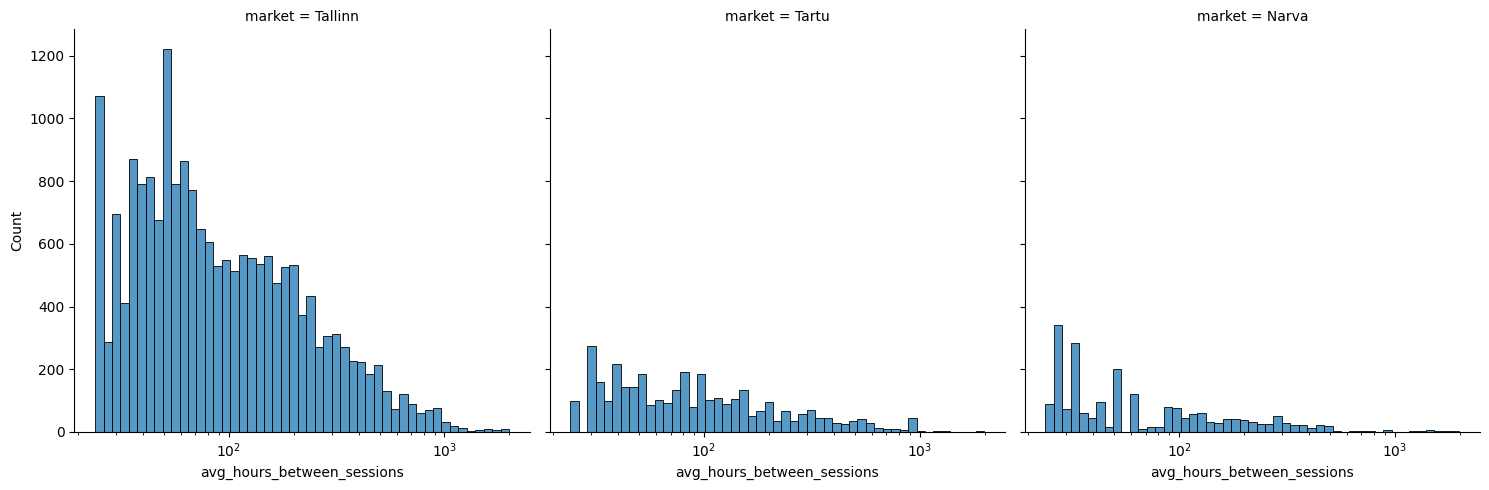

In [56]:
sns.displot(df_copy, x='avg_hours_between_sessions', col='market', log_scale=True)

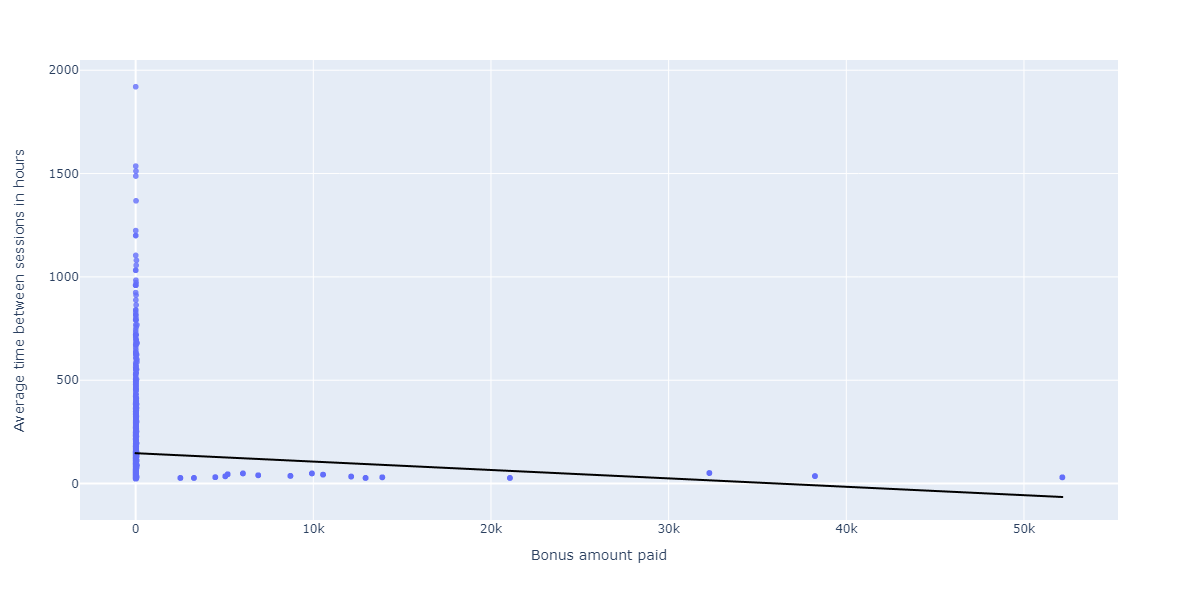

In [57]:
# Impact of bonuses on activity

px.scatter(data_frame=df_copy[df_copy.bonus > 0], 
           x='bonus', # что по оси х
           y='avg_hours_between_sessions',
                 opacity=0.8,  # Transparency
                 trendline='ols', 
                 trendline_color_override='black',
                 height=600, 
                 width=700,
           labels = {'bonus':'Bonus amount paid', 'avg_hours_between_sessions':'Average time between sessions in hours'}
)

In [58]:
df_copy.to_csv('data_yolo_task1.csv', index=None,
         sep=';') 